## Problem Statement

#### Market Risk

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [26]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [5]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [9]:
stock_prices['Avg. Prices'] = (stock_prices['Infosys'] + stock_prices['Indian_Hotel'] + stock_prices['Mahindra_&_Mahindra'] + stock_prices['Axis_Bank'] + stock_prices['SAIL'] + stock_prices['Shree_Cement'] + stock_prices['Sun_Pharma'] + stock_prices['Jindal_Steel'] + stock_prices['Idea_Vodafone'] + stock_prices['Jet_Airways'])/10

In [10]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways,Avg. Prices
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278,787.6
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303,813.3
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280,801.2
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282,809.5
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243,790.1


In [11]:
print('The number of rows (Observations) is',stock_prices.shape[0],'\n''The number of columns (Variables) is',stock_prices.shape[1])

The number of rows (Observations) is 314 
The number of columns (Variables) is 12


In [12]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 314 non-null    object 
 1   Infosys              314 non-null    int64  
 2   Indian_Hotel         314 non-null    int64  
 3   Mahindra_&_Mahindra  314 non-null    int64  
 4   Axis_Bank            314 non-null    int64  
 5   SAIL                 314 non-null    int64  
 6   Shree_Cement         314 non-null    int64  
 7   Sun_Pharma           314 non-null    int64  
 8   Jindal_Steel         314 non-null    int64  
 9   Idea_Vodafone        314 non-null    int64  
 10  Jet_Airways          314 non-null    int64  
 11  Avg. Prices          314 non-null    float64
dtypes: float64(1), int64(10), object(1)
memory usage: 29.6+ KB


In [13]:
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.750,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.000,157.0
Mahindra_&_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.000,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.250,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.750,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.250,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.000,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.750,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.000,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.000,871.0


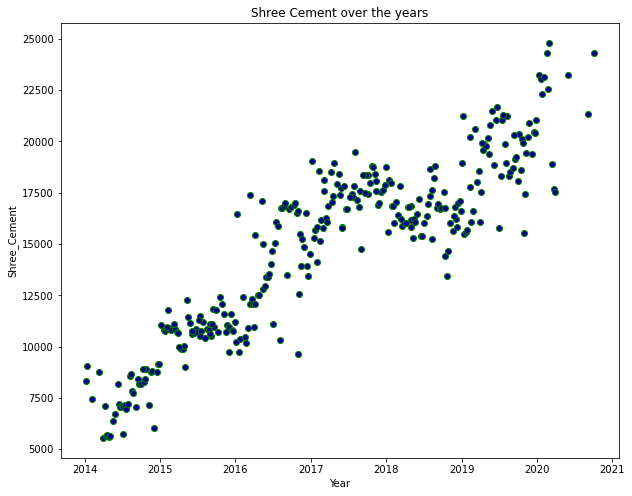

In [17]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Shree_Cement'], edgecolors='green', color = 'darkblue')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree Cement over the years')
plt.show()

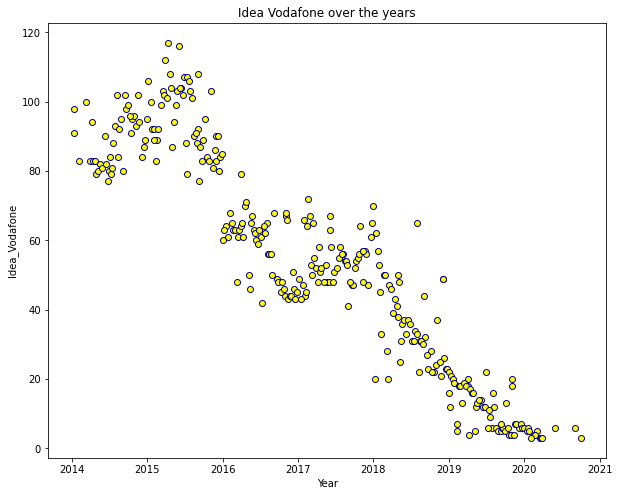

In [30]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea_Vodafone'], edgecolors='darkblue', color = 'yellow')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea Vodafone over the years')
plt.show()

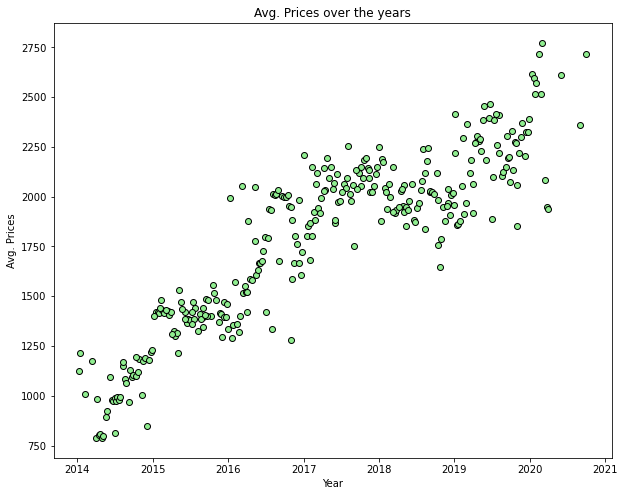

In [33]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Avg. Prices'], edgecolors='black', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Avg. Prices')
plt.title('Avg. Prices over the years')
plt.show()

In [15]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [16]:
stock_returns.shape

(314, 11)

In [34]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways,Avg. Prices
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112,0.032110
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943,-0.014989
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117,0.010306
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846,-0.024257


In [35]:
stock_returns.tail()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways,Avg. Prices
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833,0.020528
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671,-0.084428
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783,-0.125030
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531,-0.066114
313,-0.017228,0.000000,-0.031198,0.051432,0.090972,-0.006816,0.040585,-0.081917,0.000000,0.000000,-0.005759


In [18]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
Avg. Prices            0.002879
dtype: float64

In [19]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
Avg. Prices            0.035459
dtype: float64

In [38]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


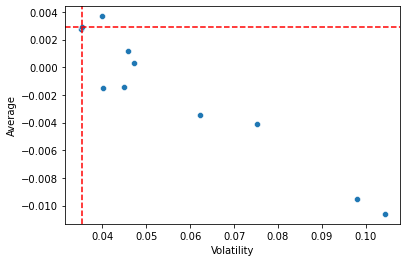

In [21]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.035459,linestyle='--', color = "red")
plot.axhline(y=0.002879,linestyle='--', color = "red")
plt.show()

In [22]:
df.loc['Avg. Prices'][0]

0.0028785587224396214

In [23]:
df[df['Average'] > df.loc['Avg. Prices'][0]].sort_values(by = 'Volatility')

,Average,Volatility
Shree_Cement,0.003681,0.039917


### END